In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from main import init_environment
init_environment()

In [3]:
import ocr
import numpy as np

ocr.predict_characters(np.zeros((1, 1, 1)))

2022-02-20 20:33:09.124507: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/teo/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-02-20 20:33:09.124526: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


INFO:root:Loaded model weights from disk.


2022-02-20 20:33:10.530595: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-20 20:33:10.530805: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/teo/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-02-20 20:33:10.530852: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/teo/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-02-20 20:33:10.530894: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublas

['M']

In [6]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,30)

(3468, 4624, 3)
Fixed image:


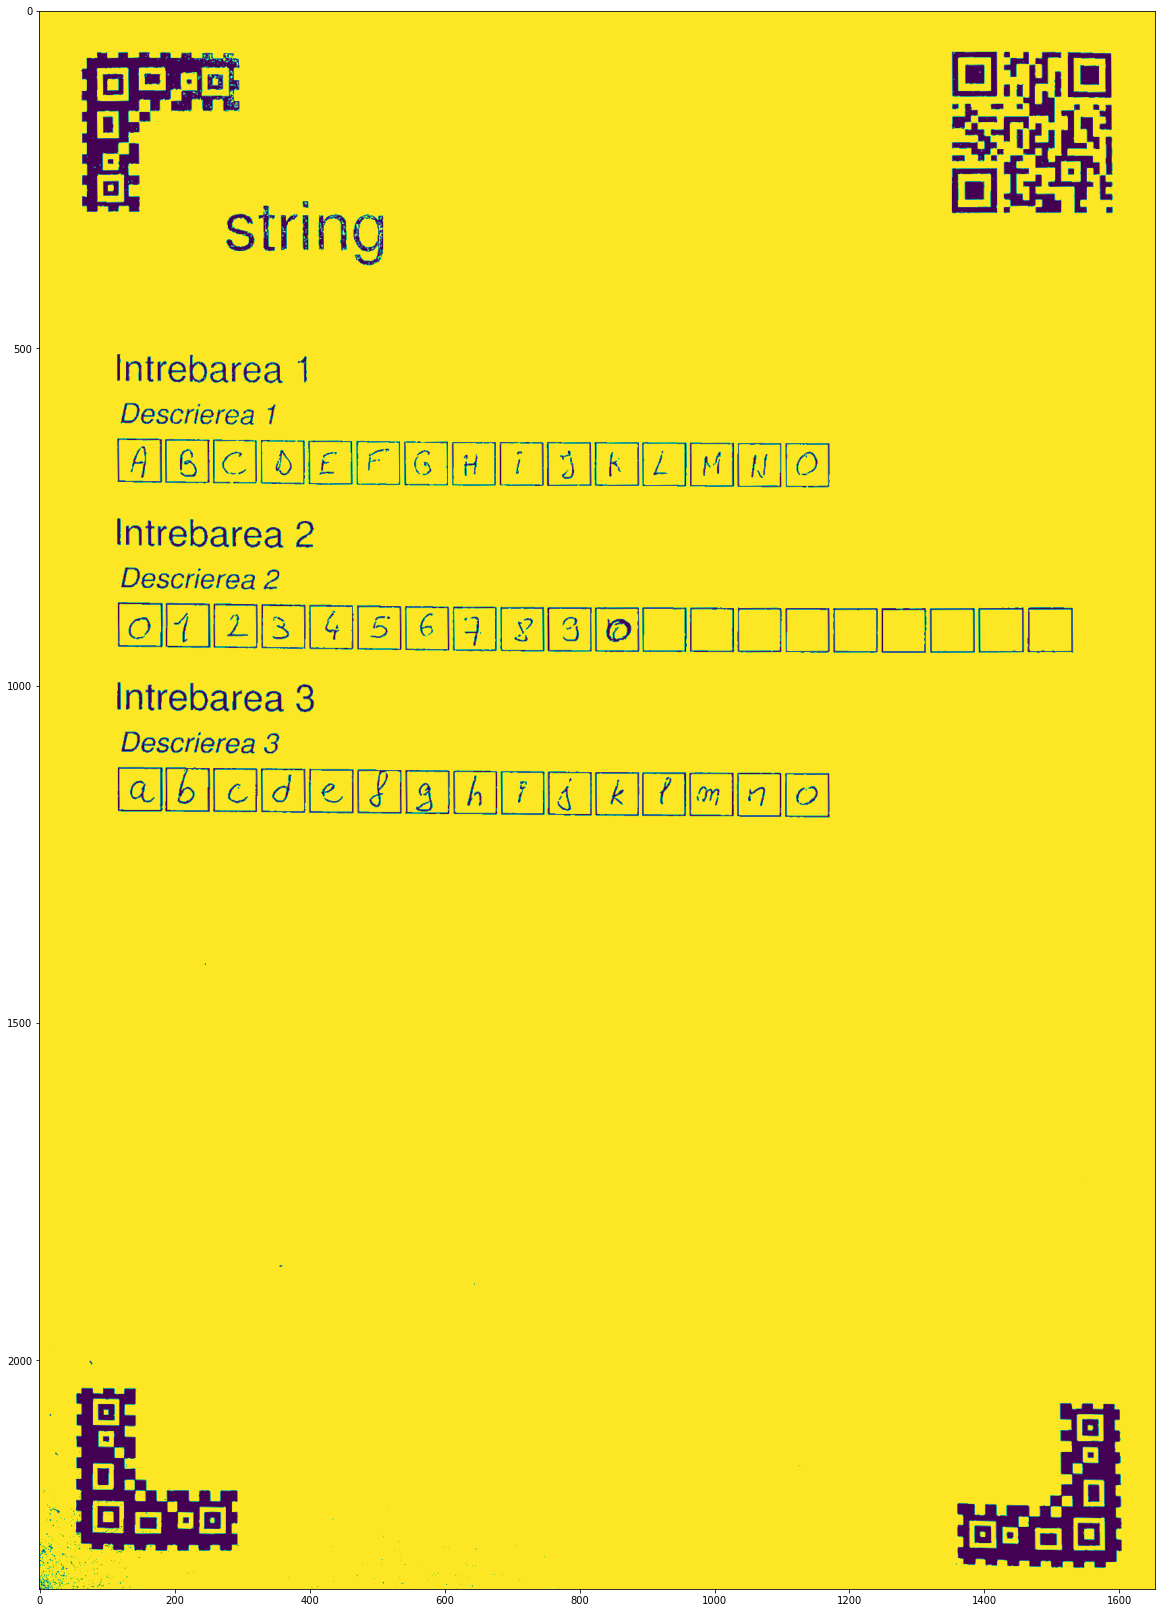

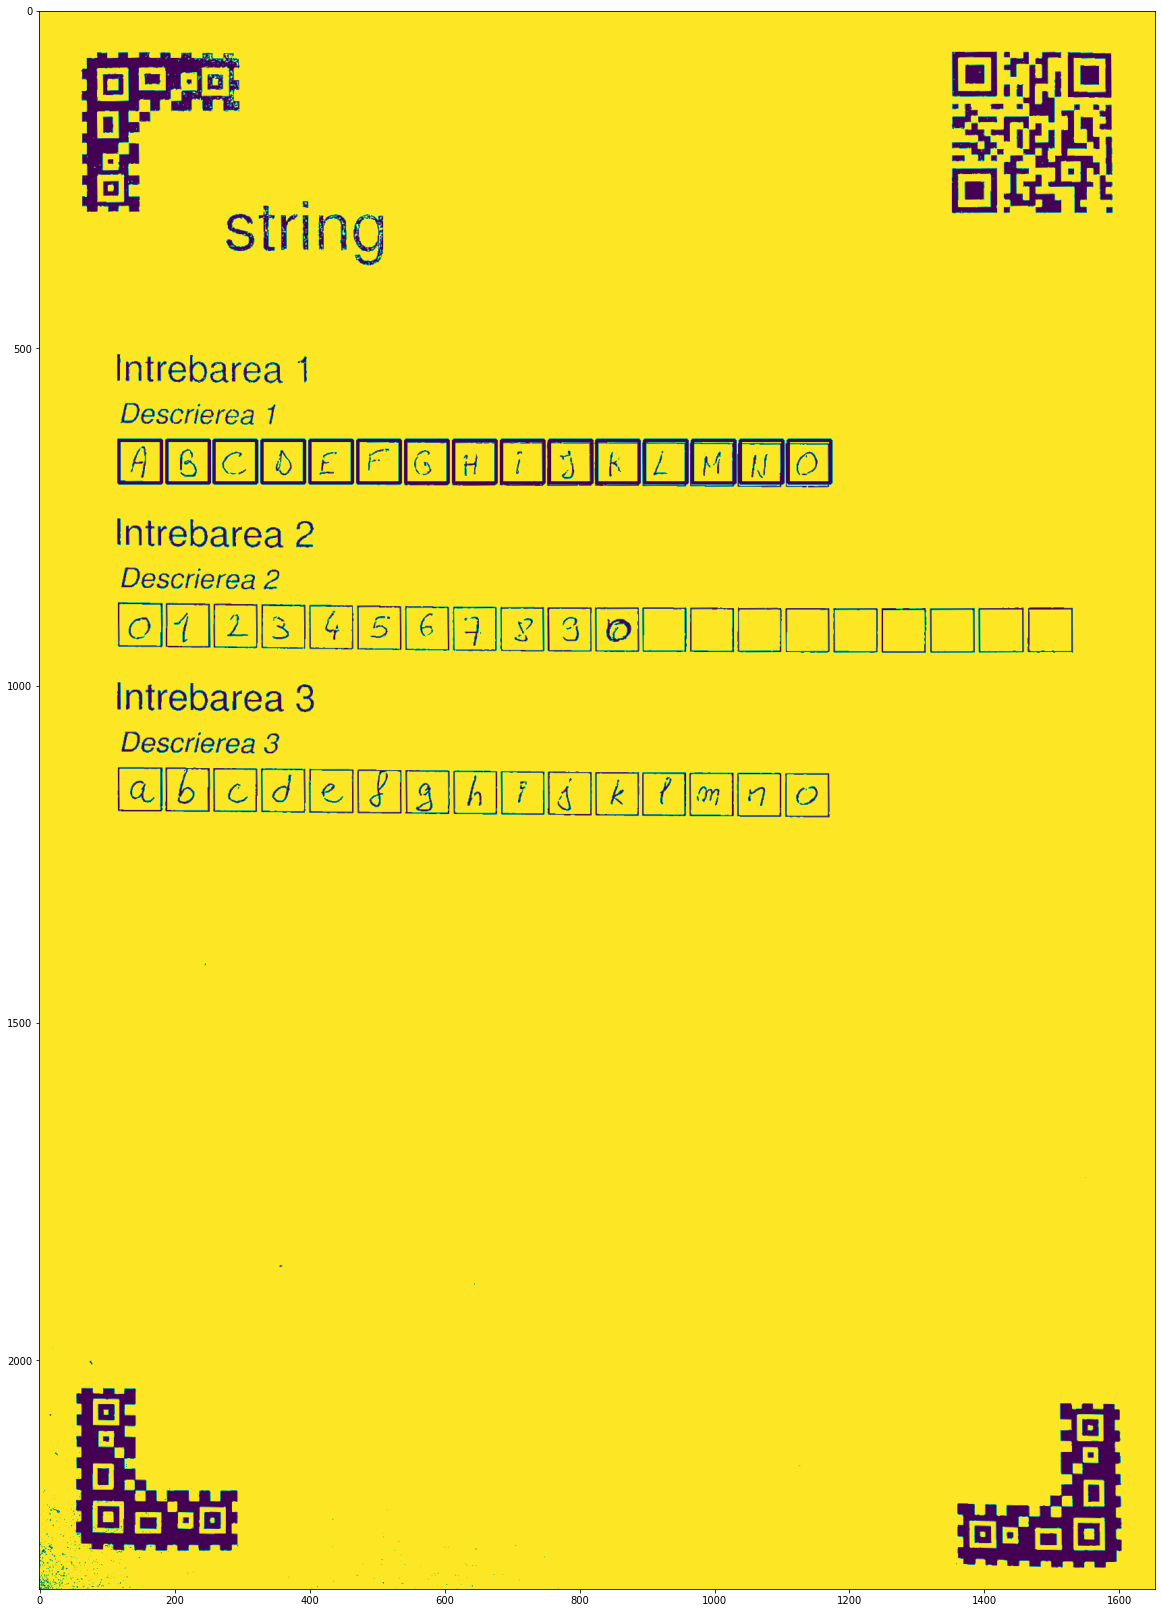

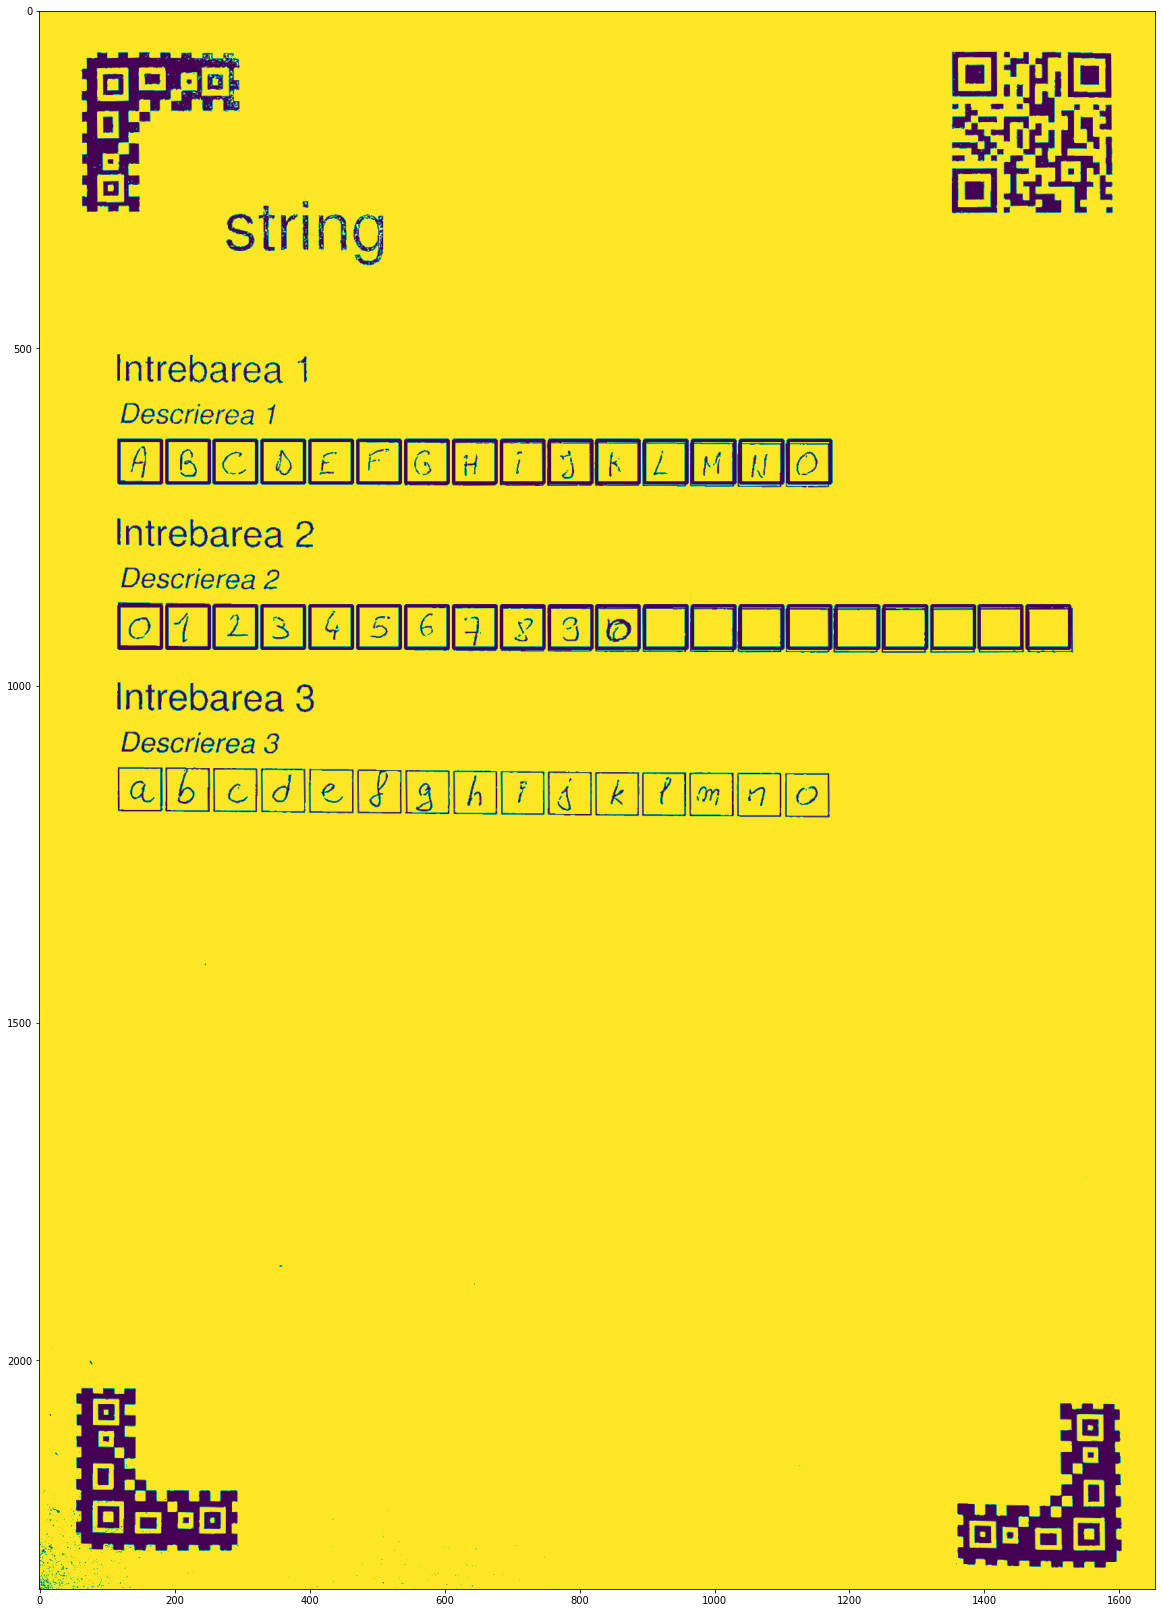

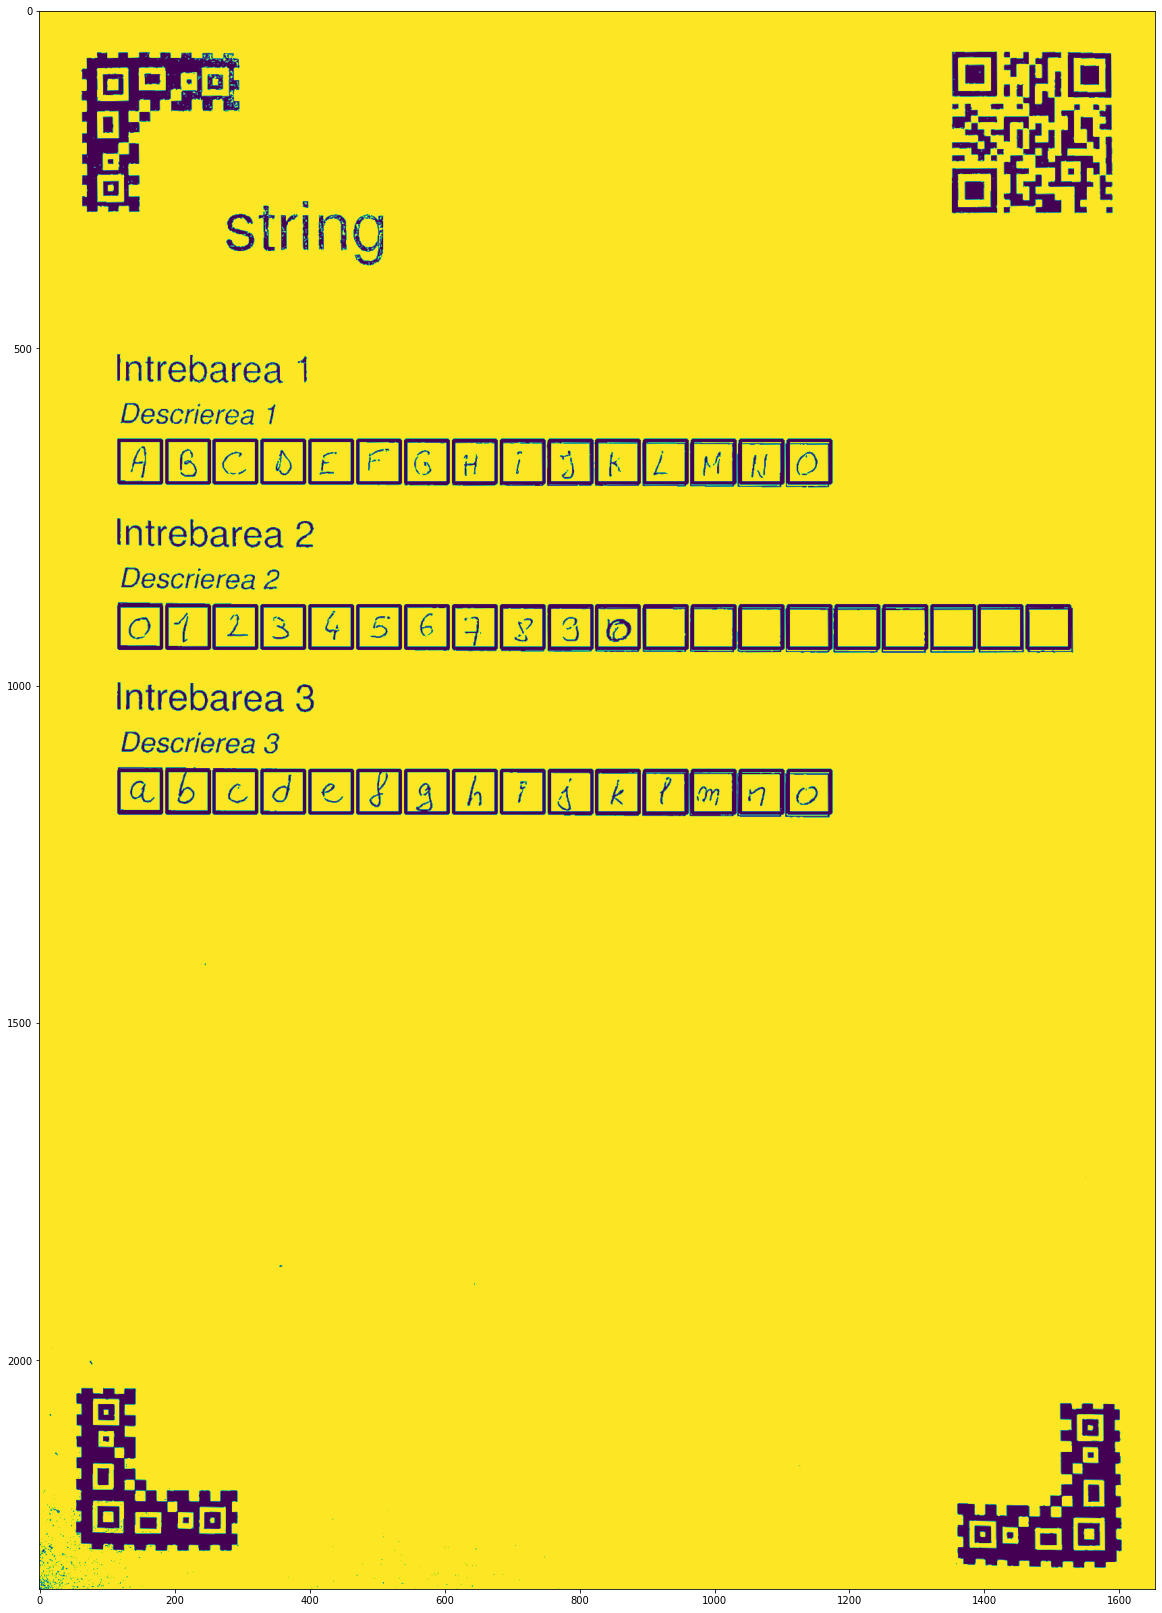

(<smart_forms_types.pdf_form.PdfForm at 0x7fbb55c1cfd0>,
 [['i', 'i', 'i', 'i', 'i', 'i', 'i', '4', '1', 'i', 'i', '4', 'i', 'i', 'j'],
  ['i',
   'i',
   'i',
   'i',
   'i',
   'i',
   'i',
   'h',
   'T',
   'i',
   'L',
   'L',
   'i',
   'i',
   'j',
   'i',
   'i',
   'i',
   'i',
   'i'],
  ['i', 'i', 'i', 'i', 'i', 'i', 'i', '4', '1', 'i', 'L', 'u', 'i', 'i', 'j']])

In [8]:
import pdf_processor.form_extractor as form_extractor

with open("../data/trials/20220220_203102.jpg", "rb") as fin:
    img = fin.read()

form_extractor.process_file(img, "img.jpg")

In [ ]:
import smart_forms_types as types
import pdf_processor
question = types.FormTextQuestion(
    title = "Intrebare",
    description = "detalii intrebare",
    maxAnswerLength = 10
)

desc = types.FormDescription(
    title = "Titlu",
    description = "Descriere",
    canBeFilledOnline = False,
    needsToBeSignedInToSubmit = False,
    formId = "form 1234",
    questions = [question]
)

m = pdf_generator.form_creator.create_form_from_description(desc)

In [3]:
import base64
raw = ''
pdf_bytes = base64.b64decode(raw)

INFO:matplotlib.font_manager:Failed to extract font properties from /usr/share/fonts/cantarell/Cantarell-VF.otf: In FT2Font: Can not load face (error code 0x8e)
INFO:matplotlib.font_manager:Failed to extract font properties from /usr/share/fonts/google-noto-emoji/NotoColorEmoji.ttf: In FT2Font: Can not load face.  Unknown file format.
INFO:matplotlib.font_manager:generated new fontManager


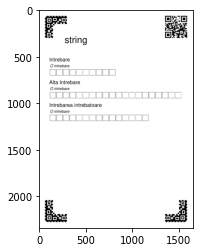

In [4]:
import pdf2image
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = pdf2image.convert_from_bytes(pdf_bytes)[0]
image = np.array(image)
# image = cv.rotate(image, cv.ROTATE_90_CLOCKWISE)
plt.imshow(image)

In [9]:
def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv.INTER_LINEAR)
  return result

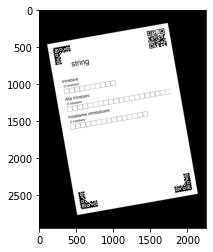

In [23]:
image_rotated = rotate_image(np.pad(image, ((300, 300), (300, 300), (0, 0)), mode='constant', constant_values=0), 10.)
plt.imshow(image_rotated)
plt.imsave("../data/img.jpg", image_rotated)

In [4]:
import pdf_processor.form_extractor as f_e

form_obj = f_e.find_maching_template(image)

2022-02-19 20:46:32.115203: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/teo/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-02-19 20:46:32.115223: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


NameError: name 'image' is not defined

(2939, 2254, 3)
INFO:root:Connected to mongo cloud.
Fixed image:


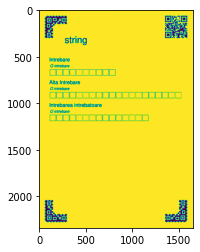

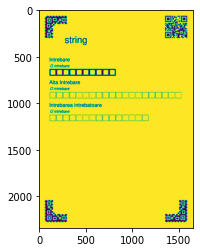

INFO:root:Model not found on disk. Training...


2022-02-19 20:46:37.457275: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-19 20:46:37.457515: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/teo/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-02-19 20:46:37.457580: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/teo/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-02-19 20:46:37.457632: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublas

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [5]:
with open("../data/img.jpg", "rb") as fin:
    img_bin = fin.read()

f_e.process_file(img_bin, "img.jpg")

In [24]:
template = pdf2image.convert_from_bytes(form_obj.extract_raw_pdf_bytes())
template = np.array(template[0])

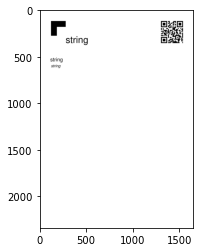

In [25]:
plt.imshow(template)

In [26]:
solved = f_e.change_image_perspective(image, template)

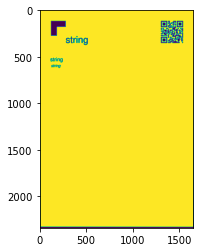

In [27]:

plt.imshow(solved)